A couple of emendents:

Do a separate analysis for 
1. lower case letters and numbers
2. upper case letters and numbers

including the distance graph and the distribution of distances.

Then for each - do the pairs that are zero distance (hopefully that will be a LOT smaller)

If we still have far too many that are the same distance, we may need to add a feature.

Ideally, we will have < 12 pairs that are not distinguishable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.8, 9.6]

df = pd.read_csv('Letters.csv', index_col=0)
df

,Stem,Tail,Shoulder,up Down Sym,Right Left,Cross Bar,arm,Bowl
A,0,0,0,0,1,1,0,0
B,0,0,1,1,1,1,0,1
C,0,0,0,1,0,0,0,0
D,0,0,0,1,0,0,0,1
E,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
5,1,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,1
7,1,0,0,0,0,0,1,0
8,0,0,0,1,0,0,1,1


In [2]:
import string

uppercase_letters = list(string.ascii_uppercase)
lowercase_letters = list(string.ascii_lowercase)
numbers = [ str(i) for i in range(1, 10) ] 

uppercase_and_numbers = uppercase_letters + numbers
lowercase_and_numbers = lowercase_letters + numbers

uppercase_DF = df.loc[uppercase_and_numbers]
lowercase_DF = df.loc[lowercase_and_numbers]

In [3]:
def binary_distance(a, b):
    return np.sum(a != b)

def calculate_distance_matrix(df):
    distance_matrix = np.zeros((len(df), len(df)))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            distance = binary_distance(df.iloc[i], df.iloc[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
    return distance_matrix

uppercase_distance_matrix = calculate_distance_matrix(uppercase_DF)
lowercase_distance_matrix = calculate_distance_matrix(lowercase_DF)

/Users/suibhneofoighil/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


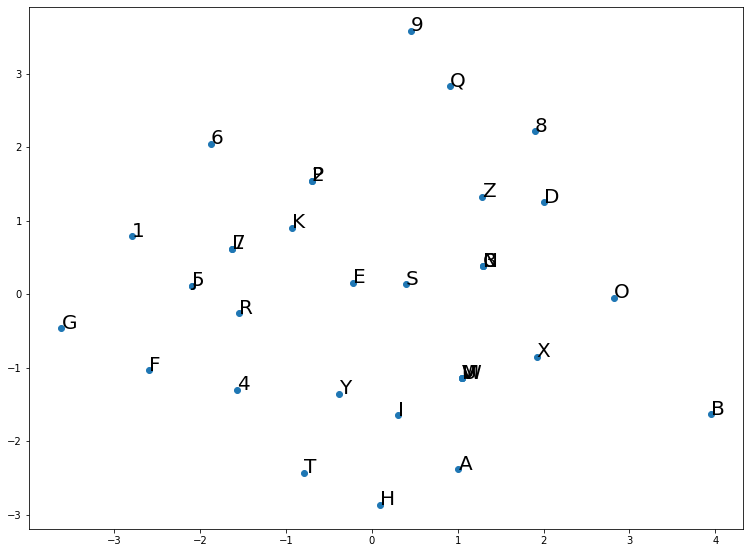

/Users/suibhneofoighil/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


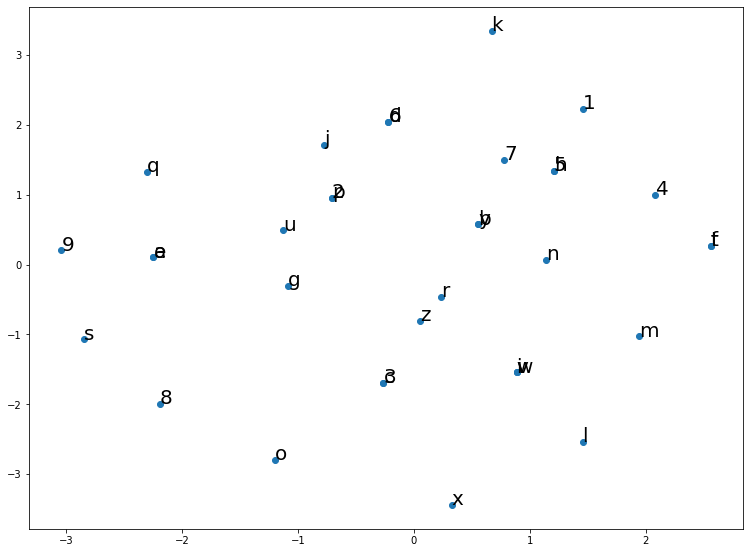

In [4]:
from sklearn.manifold import MDS

def visualize_distance_matrix(distance_matrix, labels=None):
    mds = MDS(n_components=2, dissimilarity='precomputed')
    mds_coordinates = mds.fit_transform(distance_matrix)
    x = mds_coordinates[:, 0]
    y = mds_coordinates[:, 1]
    plt.scatter(x, y)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (x[i], y[i]), fontsize=20)
    plt.show()

uppercase_labels = uppercase_DF.index
visualize_distance_matrix(uppercase_distance_matrix, uppercase_labels)

lowercase_labels = lowercase_DF.index
visualize_distance_matrix(lowercase_distance_matrix, lowercase_labels)

In [5]:
uppercase_combinations = np.where(uppercase_distance_matrix== 0)
uppercase_combinations = list(zip(*uppercase_combinations))
uppercase_combinations = [ (uppercase_labels[row], uppercase_labels[col]) for row, col in uppercase_combinations if row != col]

def remove_reverse_pairs(pairs):
    deduped_pairs = []
    for pair in pairs:
        if (pair[1], pair[0]) not in deduped_pairs:
            deduped_pairs.append(pair)
    return deduped_pairs

uppercase_combinations = remove_reverse_pairs(uppercase_combinations)

print('Uppercase zero distance combinations:')
uppercase_combinations

Uppercase zero distance combinations:


[('C', 'N'),
 ('C', '3'),
 ('J', '5'),
 ('L', '7'),
 ('M', 'U'),
 ('M', 'V'),
 ('M', 'W'),
 ('N', '3'),
 ('P', '2'),
 ('U', 'V'),
 ('U', 'W'),
 ('V', 'W')]

In [6]:
lowercase_combinations = np.where(lowercase_distance_matrix == 0)
lowercase_combinations = list(zip(*lowercase_combinations))
lowercase_combinations = [ (lowercase_labels[row], lowercase_labels[col]) for row, col in lowercase_combinations if row != col]
lowercase_combinations = remove_reverse_pairs(lowercase_combinations)
print('Lowercase zero distance combinations:')
lowercase_combinations

Lowercase zero distance combinations:


[('a', 'e'),
 ('b', 'y'),
 ('c', '3'),
 ('d', '6'),
 ('f', 't'),
 ('h', '5'),
 ('i', 'v'),
 ('i', 'w'),
 ('p', '2'),
 ('v', 'w')]

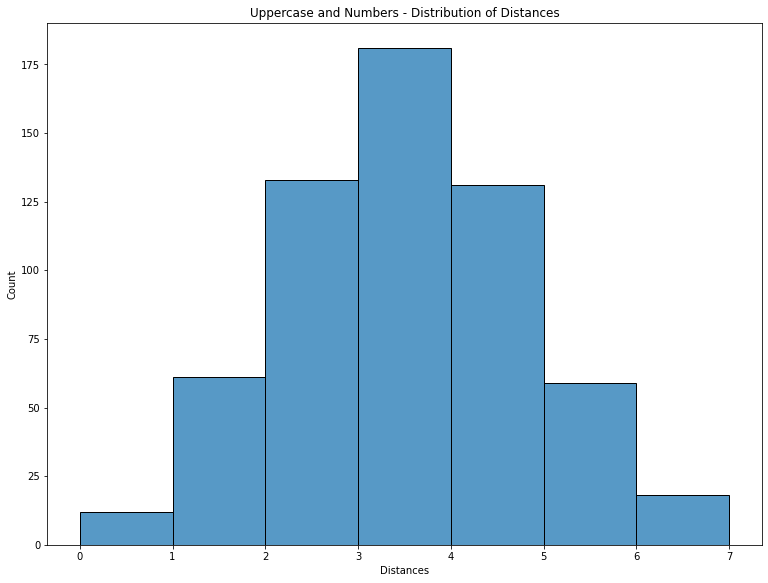

In [7]:
triangular_indices = np.triu_indices(uppercase_distance_matrix.shape[0], k=1)
flat_upper_triangular = uppercase_distance_matrix[triangular_indices]
ax = sns.histplot(flat_upper_triangular, bins=range(int(np.min(flat_upper_triangular)), int(np.max(flat_upper_triangular) + 1)))
ax.set(xlabel='Distances', title='Uppercase and Numbers - Distribution of Distances')
plt.show()

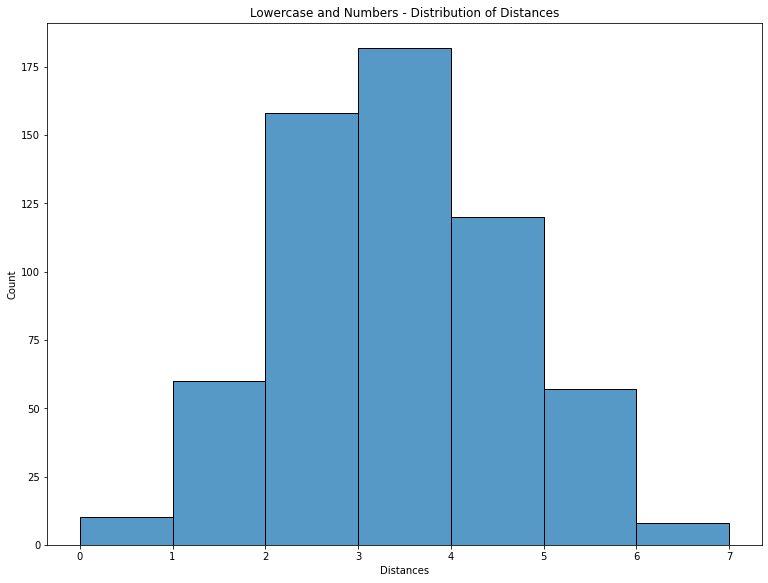

In [8]:
triangular_indices = np.triu_indices(lowercase_distance_matrix.shape[0], k=1)
flat_upper_triangular = lowercase_distance_matrix[triangular_indices]
ax = sns.histplot(flat_upper_triangular, bins=range(int(np.min(flat_upper_triangular)), int(np.max(flat_upper_triangular) + 1)))
ax.set(xlabel='Distances', title='Lowercase and Numbers - Distribution of Distances')
plt.show()

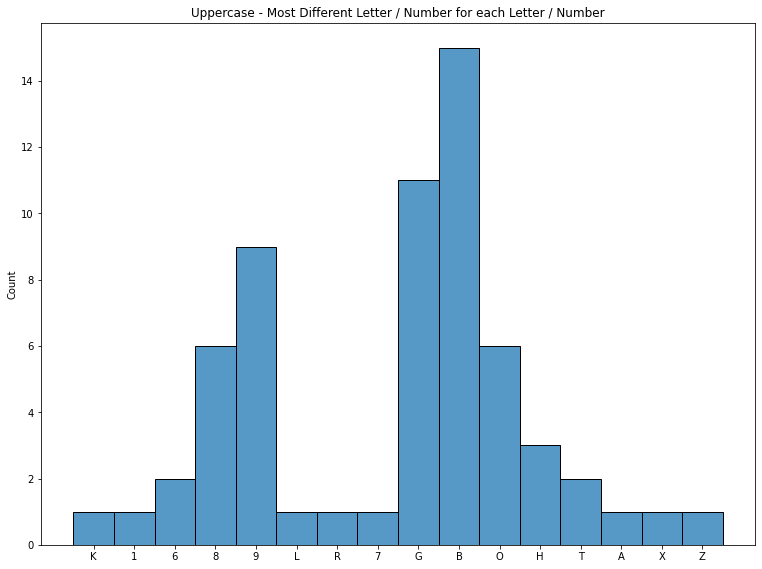

In [9]:
np.fill_diagonal(uppercase_distance_matrix, -1)
max_distance_LNs = []
for row in uppercase_distance_matrix:
    max_distance_LNs = max_distance_LNs + list(uppercase_DF.index[np.flatnonzero(row == np.max(row))])

ax = sns.histplot(max_distance_LNs)
ax.set(title='Uppercase - Most Different Letter / Number for each Letter / Number')
plt.show()

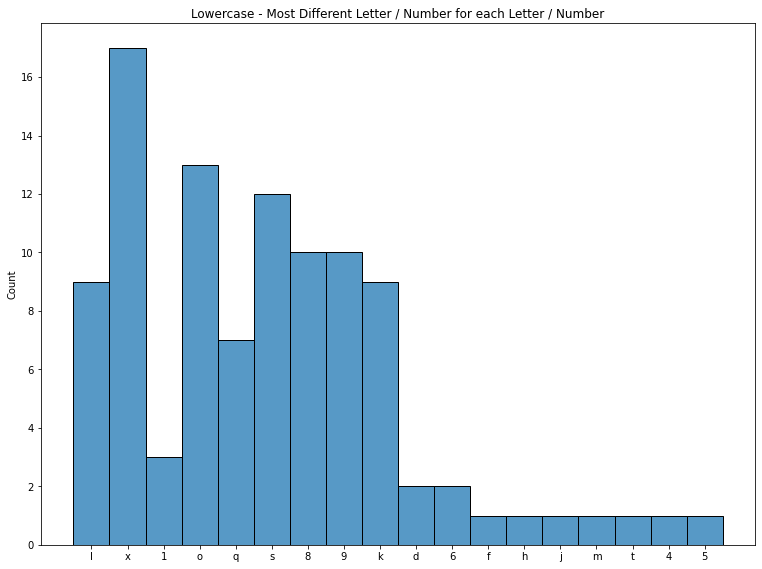

In [10]:
np.fill_diagonal(lowercase_distance_matrix, -1)
max_distance_LNs = []
for row in lowercase_distance_matrix:
    max_distance_LNs = max_distance_LNs + list(lowercase_DF.index[np.flatnonzero(row == np.max(row))])

ax = sns.histplot(max_distance_LNs)
ax.set(title='Lowercase - Most Different Letter / Number for each Letter / Number')
plt.show()